In [127]:
#Importing dependencies 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Loading the two CSV files  
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

#Reading CSV files 
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

#Drop duplicate data from city_df - this is done so that the Axis won't have duplicate items creating an error. 
city_df = city_df.drop_duplicates('city', keep = 'first')

#Merge two data sets 
merged_df = city_df.merge(ride_df, on = 'city')

In [128]:
#Average Fare by city
avg_fare = merged_df.groupby('city')['fare'].mean()

#Total Ride by city 
total_ride = merged_df.groupby('city')['ride_id'].count()

#Total Driver by city 
total_driver = merged_df.groupby('city')['driver_count'].mean()

#city type
city_type = city_df.set_index('city')['type']

# Putting everything above into a panda data frame. 
city_info = pd.DataFrame({
    'Number of Rides': total_ride,
    'Average Fare': avg_fare,
    'Number of Drivers': total_driver,
    'Type of City': city_type
})

#city_info.sort_values('Number of Drivers', ascending = False)

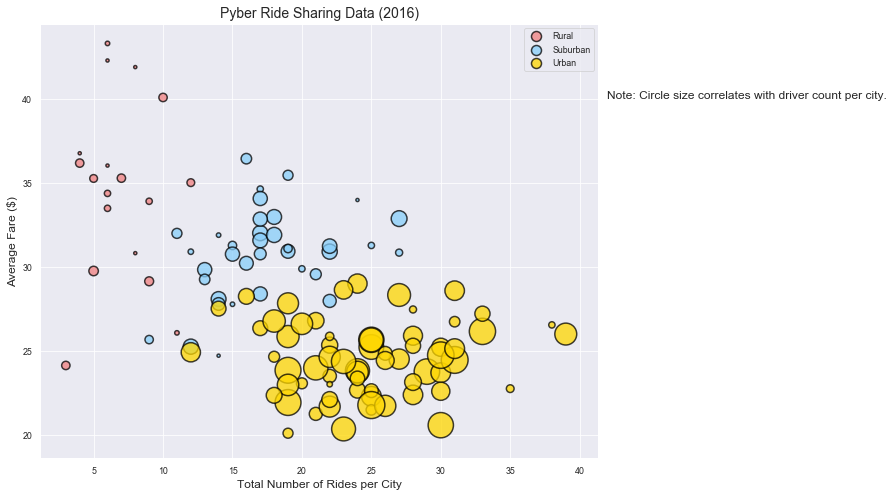

In [129]:
#Bubble Chart, bubble bubble chart 

#Defining each type of city and creating a data frame for each 
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

#Creating an object to hold the color scheme dictionary. 
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}

#Assigning color to each data set that will go onto the plot. 
city_color = {'Urban': color_scheme['Gold'], 
              'Suburban': color_scheme['Light Sky Blue'], 
              'Rural': color_scheme['Light Coral']}

#Defining the axis of the plot - this is to help me keep track. 
#x = Total number of rides
#y = Average fare $
#s = Total number of driver 

#Scatter plot time 
sns.set()
sns.set_context("paper") 
plt.figure(figsize=(10,8))
plt.scatter(rural['Number of Rides'],rural['Average Fare'], s=rural['Number of Drivers']*10,
           color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = 0.75, linewidth = 1.5)

plt.scatter(suburban['Number of Rides'],suburban['Average Fare'], s=suburban['Number of Drivers']*10,
           color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = 0.75, linewidth = 1.5)

plt.scatter(urban['Number of Rides'],urban['Average Fare'], s=urban['Number of Drivers']*10,
           color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = 0.75, linewidth = 1.5)

plt.title('Pyber Ride Sharing Data (2016)', fontsize = 14)
plt.xlabel('Total Number of Rides per City', fontsize = 12)
plt.ylabel('Average Fare ($)', fontsize = 12)
plt.text(42, 40,"Note: Circle size correlates with driver count per city.", fontsize = 12)

lgnd = plt.legend(frameon = True)
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]
plt.show()

In [130]:
total_fare = merged_df.groupby('type')['fare'].sum()
total_fare

total_fare.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

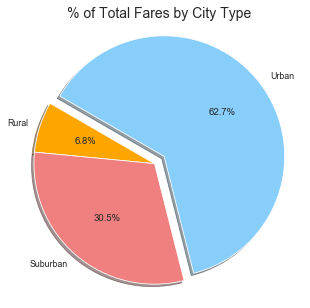

In [131]:
colors = ["orange", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.1)
plt.figure(figsize=(5,5))
plt.pie(total_fare, labels=total_fare.index, colors = colors, autopct="%1.1f%%", 
        shadow=True, startangle=150, explode=explode)
plt.title('% of Total Fares by City Type', fontsize = 14)
plt.axis('equal')
plt.show()

In [132]:
##Total Rides by City Type 

total_ride = merged_df.groupby('type')['ride_id'].count()
total_ride
total_ride.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

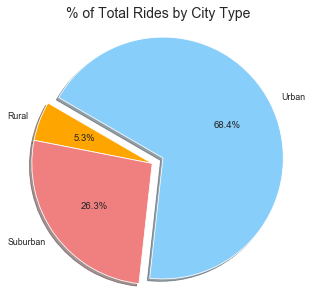

In [133]:
colors = ["orange", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.1)
plt.figure(figsize=(5,5))
plt.pie(total_ride, labels=total_ride.index, colors = colors, autopct="%1.1f%%", 
        shadow=True, startangle=150, explode=explode)
plt.title('% of Total Rides by City Type', fontsize = 14)
plt.axis('equal')
plt.show()

In [149]:
## Total Driver 
total_driver = merged_df.groupby('type')['driver_count'].sum()
total_driver
total_driver.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

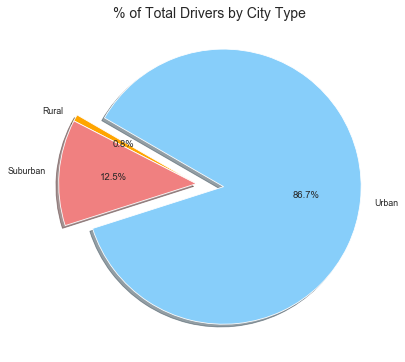

In [148]:
colors = ["orange", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.2)
plt.figure(figsize=(6,6))
plt.pie(total_driver, labels=total_driver.index, colors = colors, autopct="%1.1f%%", 
        shadow=True, startangle=150, explode=explode)
plt.title('% of Total Drivers by City Type', fontsize = 14)
plt.axis('equal')
plt.show()